In [1]:
from fastai.vision.all import *
from pathlib import Path

/home/husen/anaconda3/envs/mlgpu/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
original_path = Path("data\\AugmentedAlzheimerDataset")
augmented_path = Path("data\\OriginalDataset")

items = get_image_files(original_path) + get_image_files(augmented_path)


In [6]:
def get_label(x):
    return x.parent.name

# ✅ Use the correct base path ("data") instead of "."
dls = ImageDataLoaders.from_path_func(
    Path("data"),
    items,
    label_func=get_label,
    valid_pct=0.2,
    seed=42,
    item_tfms=Resize(224),
    batch_tfms=aug_transforms(mult=1.0)
)



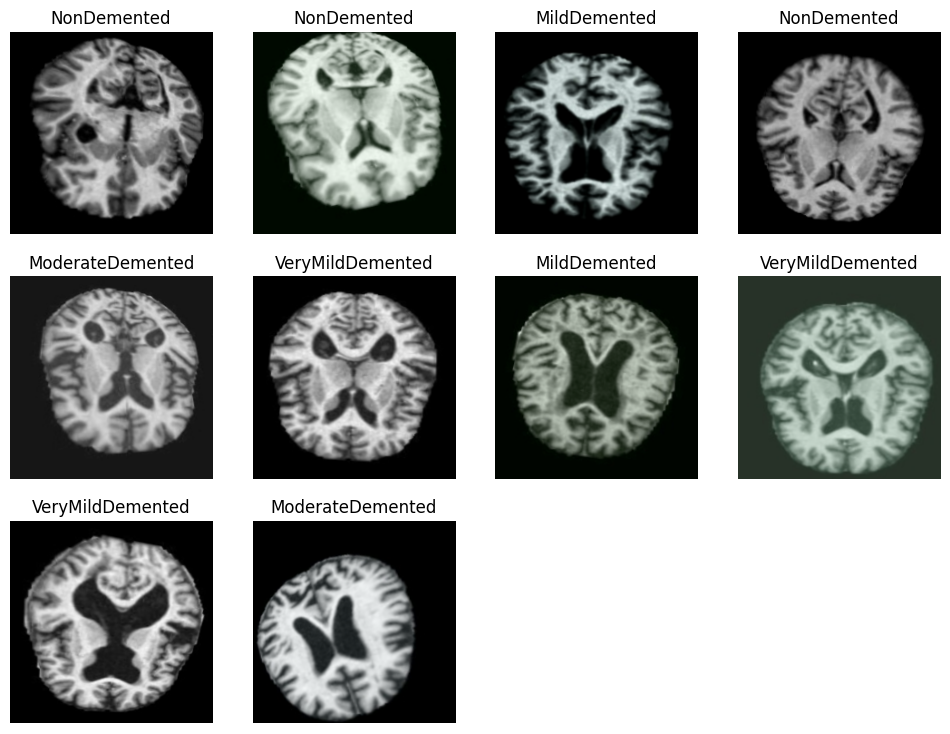

In [7]:
dls.show_batch(max_n=10)

In [8]:
learn = vision_learner(dls, resnet50, metrics=accuracy)
learn.model.cuda()

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /home/husen/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████████████████████████████████████████████████████████████████████████| 97.8M/97.8M [00:27<00:00, 3.72MB/s]


Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

In [9]:
learn.fine_tune(10)

epoch,train_loss,valid_loss,accuracy,time
0,1.056708,0.917493,0.572685,21:26


epoch,train_loss,valid_loss,accuracy,time
0,0.716306,0.636818,0.710624,39:32
1,0.478529,0.390027,0.835810,40:21
2,0.260640,0.201408,0.919391,39:43
3,0.149080,0.091812,0.965948,34:00
4,0.090699,0.058124,0.978455,34:01
5,0.059028,0.026189,0.990961,35:18
6,0.035142,0.020754,0.992447,40:23
7,0.015810,0.010152,0.996038,34:07
8,0.013088,0.006598,0.997647,34:04
9,0.012524,0.006466,0.998266,34:11


In [15]:
learn.export("model.pkl")

In [16]:
from IPython.display import FileLink
FileLink('model.pkl')


/home/husen/my_lab_workspace/alzheimer/model.pkl